In [1]:
import numpy as np

from commstools import Signal
from commstools.impairments import apply_awgn, apply_pmd


2026-02-25 18:12:48 [INFO] [commstools/backend.py] CuPy is available and functional, defaulting Signals to GPU.


In [2]:
NUM_SYMBOLS = 2**20
SYMBOL_RATE = 1e9
SPS = 2
MOD = "QAM"
ORDER = 32
ESN0_DB = 30
DGD_SYMBOLS = 0
THETA = np.pi / 6


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation (Scheme/Order),QAM / 32
3,Symbol Rate,1.00 GBaud
4,Bit Rate,5.00 Gbps
5,Sampling Rate,2.00 GHz
6,Samples Per Symbol,2.00
7,Pulse Shape,RRC
8,Duration,1.05 ms
9,Center Frequency,0.00 Hz


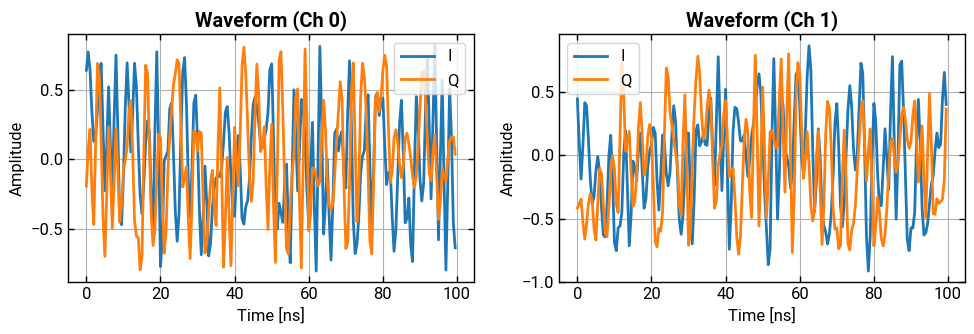

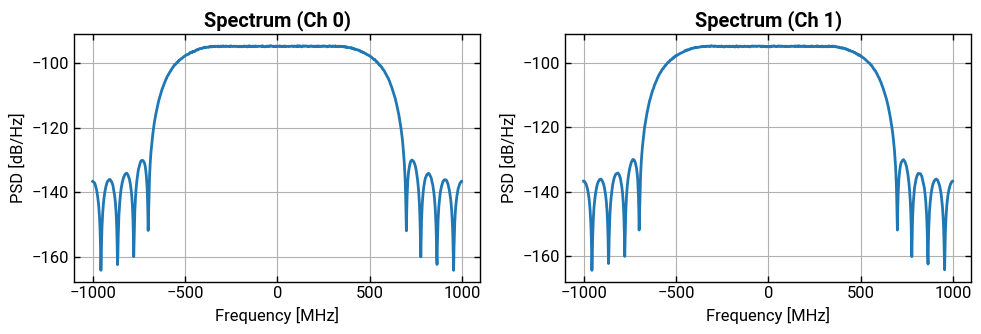

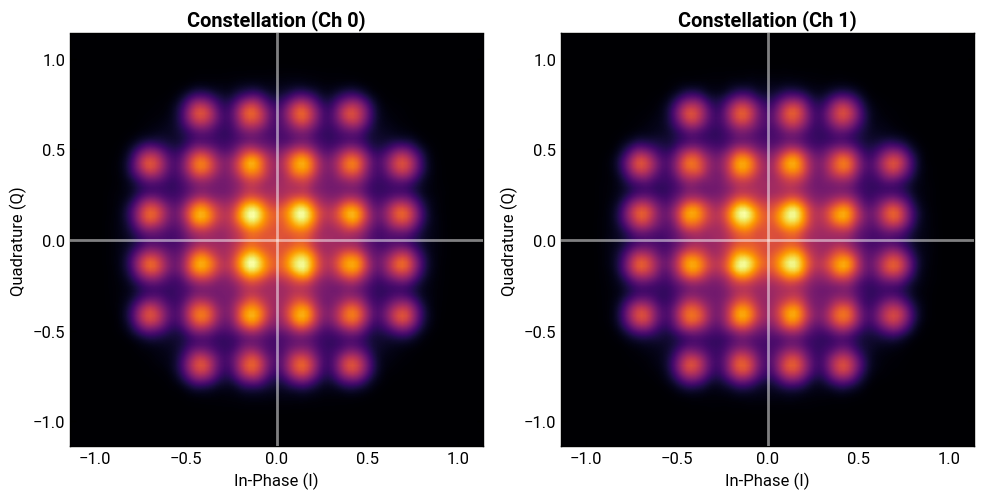

In [3]:
sig = Signal.qam(
    num_symbols=NUM_SYMBOLS,
    sps=SPS,
    symbol_rate=SYMBOL_RATE,
    order=ORDER,
    num_streams=2,
    seed=42,
)
sig.print_info()
sig.plot_waveform(num_symbols=100, show=True)
sig.plot_psd(show=True, nperseg=2**10)
sig.plot_constellation(show=True)


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation (Scheme/Order),QAM / 32
3,Symbol Rate,1.00 GBaud
4,Bit Rate,5.00 Gbps
5,Sampling Rate,2.00 GHz
6,Samples Per Symbol,2.00
7,Pulse Shape,RRC
8,Duration,1.05 ms
9,Center Frequency,0.00 Hz


2026-02-25 18:12:51 [INFO] [commstools/impairments.py] Adding AWGN (Es/N0 target: 30.00 dB).


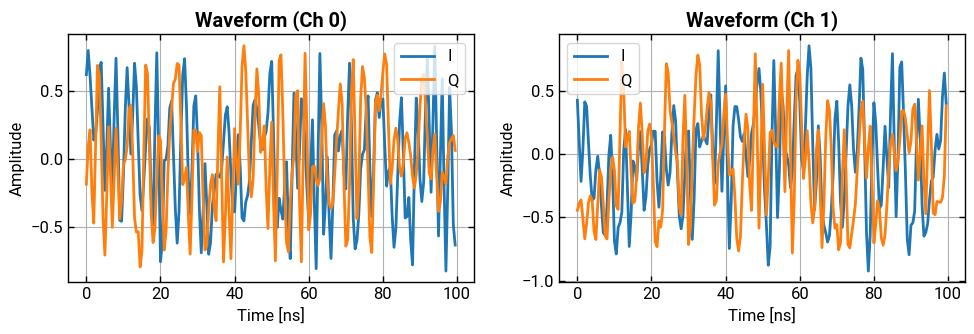

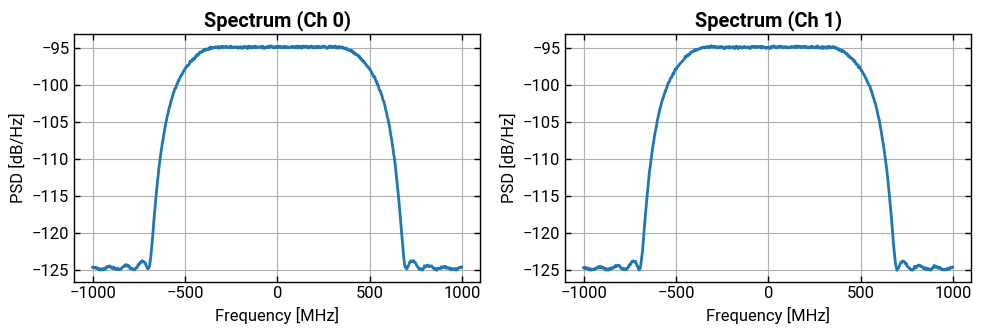

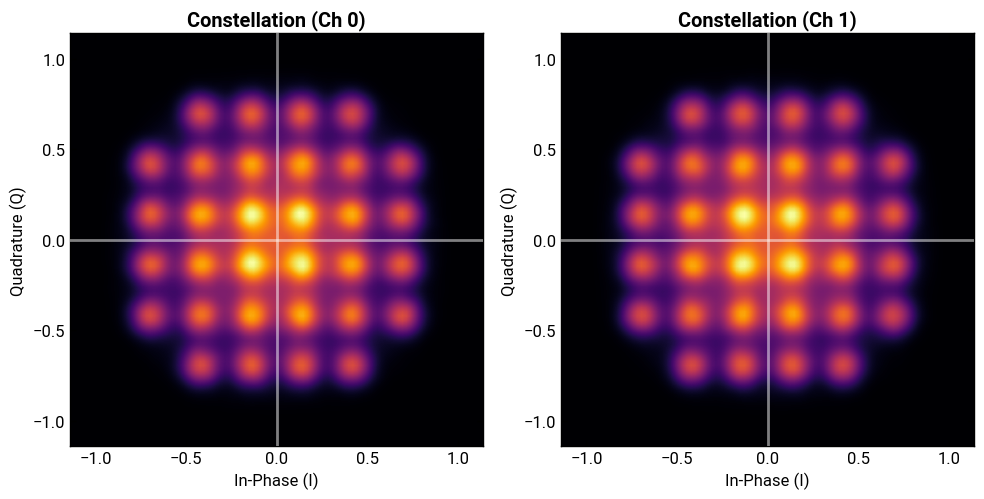

In [4]:
sig_dist = sig.copy()

sig_dist.print_info()
sig_dist = apply_awgn(sig_dist, esn0_db=ESN0_DB)
sig_dist.plot_waveform(num_symbols=100, show=True)
sig_dist.plot_psd(show=True, nperseg=2**10)
sig_dist.plot_constellation(show=True)


2026-02-25 18:12:52 [INFO] [commstools/impairments.py] Applying PMD (DGD=0.00e+00 s, theta=0.524 rad).


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation (Scheme/Order),QAM / 32
3,Symbol Rate,1.00 GBaud
4,Bit Rate,5.00 Gbps
5,Sampling Rate,2.00 GHz
6,Samples Per Symbol,2.00
7,Pulse Shape,RRC
8,Duration,1.05 ms
9,Center Frequency,0.00 Hz


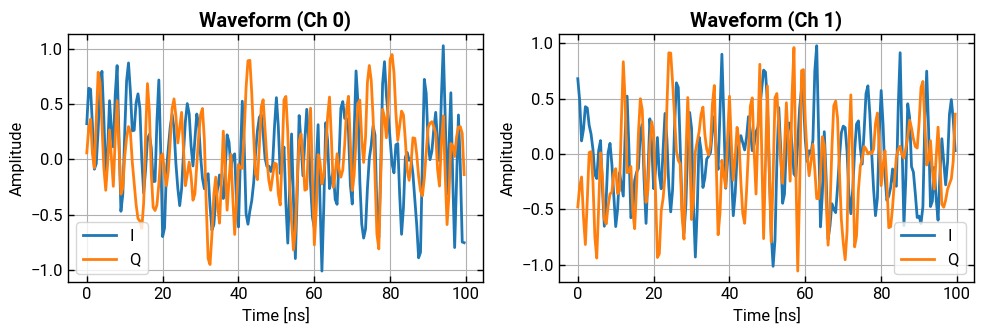

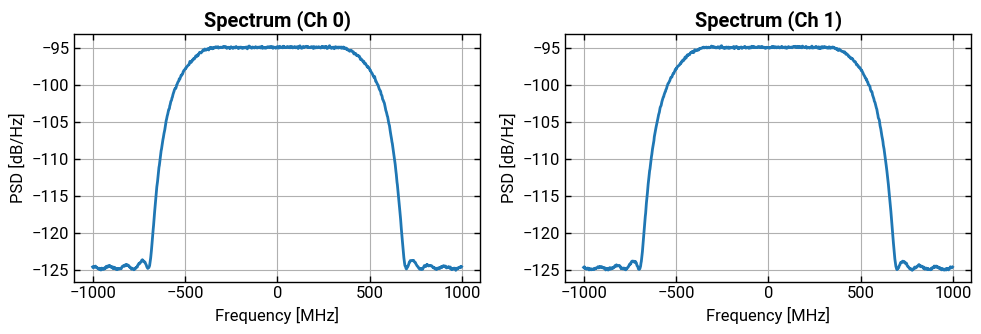

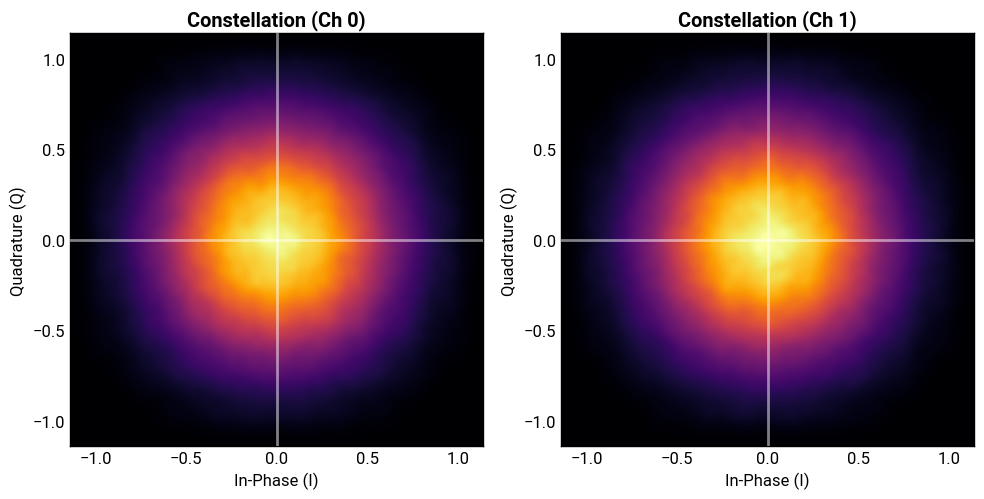

In [5]:
sig_dist = apply_pmd(sig_dist, dgd=DGD_SYMBOLS / SYMBOL_RATE, theta=THETA)

sig_dist.print_info()
sig_dist.plot_waveform(num_symbols=100, show=True)
sig_dist.plot_psd(show=True, nperseg=2**10)
sig_dist.plot_constellation(show=True)


2026-02-25 18:12:55 [INFO] [commstools/core.py] Generating shaping filter taps (shape: rrc).


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation (Scheme/Order),QAM / 32
3,Symbol Rate,1.00 GBaud
4,Bit Rate,5.00 Gbps
5,Sampling Rate,2.00 GHz
6,Samples Per Symbol,2.00
7,Pulse Shape,RRC
8,Duration,1.05 ms
9,Center Frequency,0.00 Hz


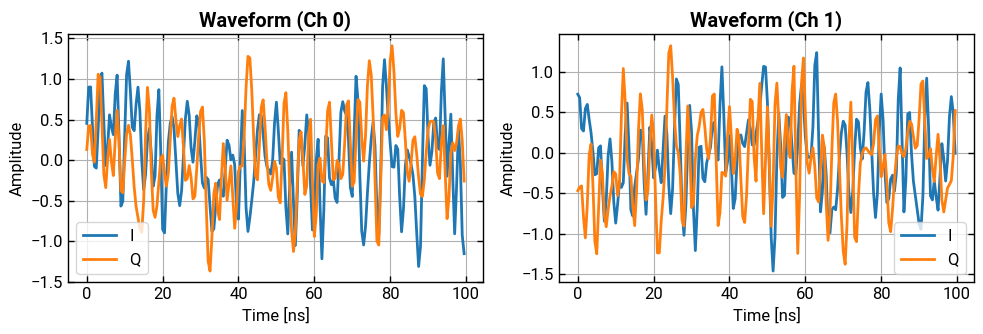

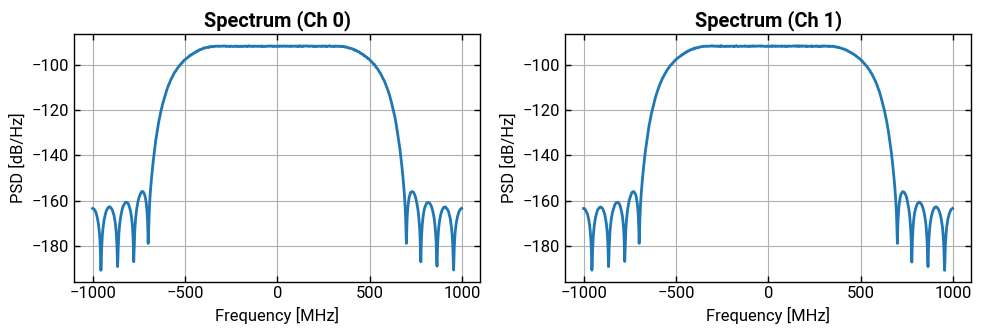

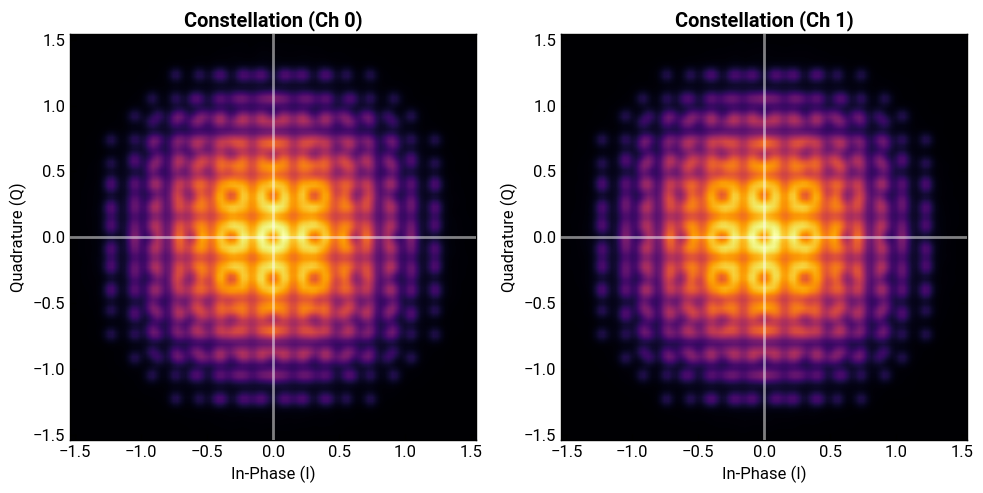

In [6]:
sig_dist.matched_filter()

sig_dist.print_info()
sig_dist.plot_waveform(num_symbols=100, show=True)
sig_dist.plot_psd(show=True, nperseg=2**10)
sig_dist.plot_constellation(show=True)


In [7]:
sig_to_eq = sig_dist.copy()
# sig_to_eq.decimate_to_symbol_rate()
sig_to_eq.print_info()

sig_to_eq.equalize(
    method="lms",
    step_size=0.05,
    num_train_symbols=2**12,
    # forgetting_factor=0.95,
    # delta=1.0,
    # leakage=1e-5,
    num_taps=21,
    backend="numba",
)


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation (Scheme/Order),QAM / 32
3,Symbol Rate,1.00 GBaud
4,Bit Rate,5.00 Gbps
5,Sampling Rate,2.00 GHz
6,Samples Per Symbol,2.00
7,Pulse Shape,RRC
8,Duration,1.05 ms
9,Center Frequency,0.00 Hz


2026-02-25 18:12:56 [INFO] [commstools/equalizers.py] LMS equalizer: num_taps=21, mu=0.05, sps=2, backend=numba, num_train_symbols=4096


Signal(samples=array([[ 0.41637513+0.12043597j,  0.8398111 +0.38147533j,
        -0.05563801-0.03942728j, ...,  1.1326282 -0.22909105j,
        -0.1779163 -0.70347327j, -1.0981998 +0.6536545j ],
       [ 0.66743225-0.43101227j,  0.2736458 -0.38099188j,
         0.49036598-0.972781j  , ..., -1.1007036 -0.669948j  ,
        -0.63534373+0.26772228j, -1.0988865 -0.6610304j ]],
      shape=(2, 1048576), dtype=complex64), sampling_rate=1000000000.0, symbol_rate=1000000000.0, mod_scheme='QAM', mod_order=32, mod_unipolar=False, mod_rz=False, source_bits=array([[1, 0, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 0]], shape=(2, 5242880), dtype=int8), source_symbols=array([[ 1.11739609-0.22347921j,  1.11739609+0.22347921j,
         0.22347921-0.67043767j, ...,  1.11739609-0.22347921j,
        -0.22347921-0.67043767j, -1.11739609+0.67043767j],
       [ 0.67069057-0.67069057j, -0.22356351-0.67069057j,
         0.67069057-1.1178176j , ..., -1.1178176 -0.67069057j,
        -0.67069057+0.22356351j, -

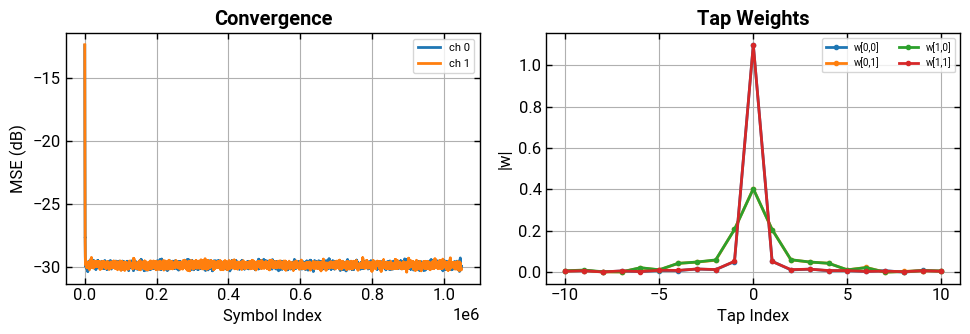

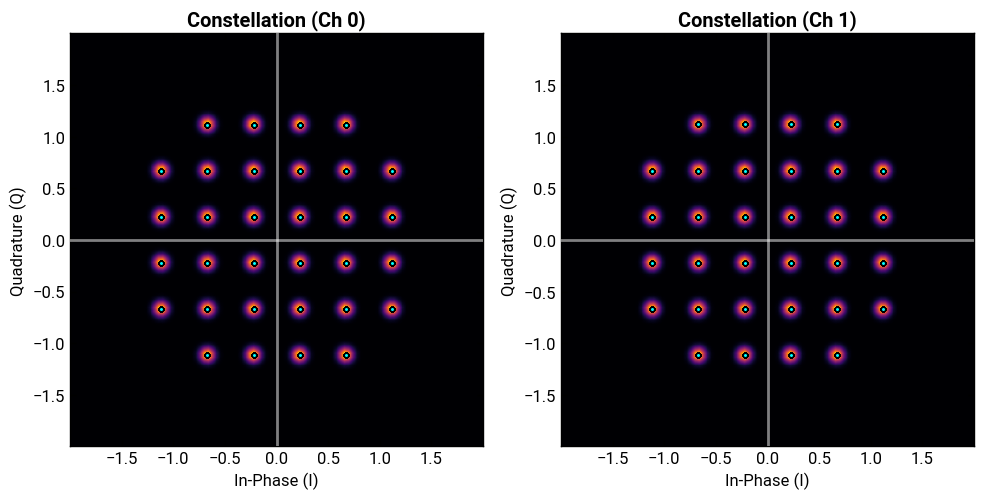

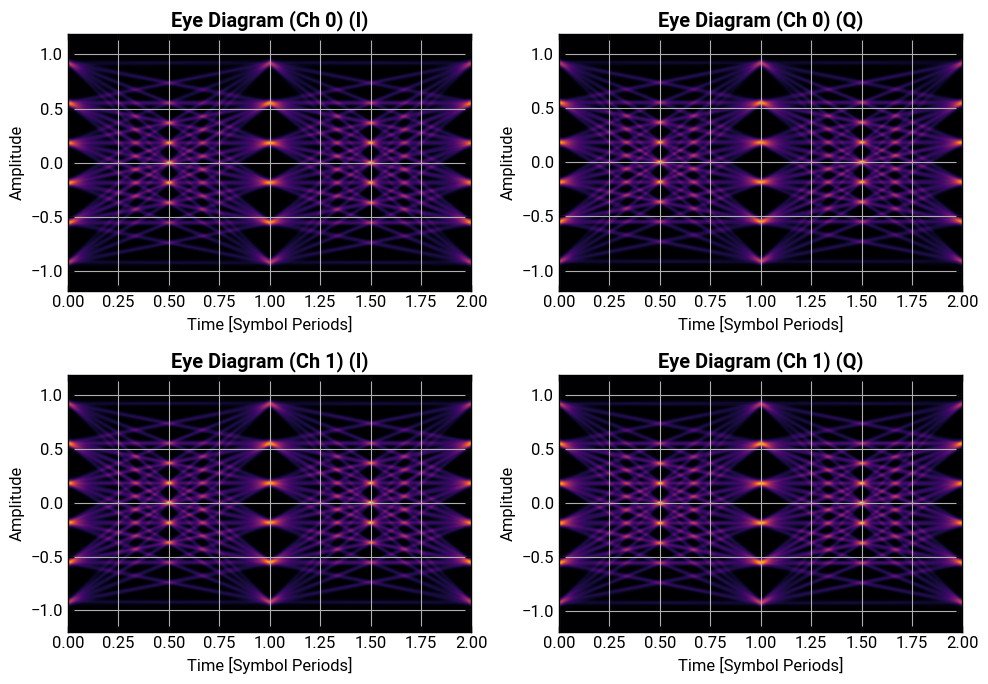

2026-02-25 18:13:00 [INFO] [commstools/core.py] Signal already at 1 sps, no downsampling needed.
2026-02-25 18:13:00 [INFO] [commstools/core.py] Discarding 4096 training symbols for EVM calculation.
2026-02-25 18:13:00 [INFO] [commstools/metrics.py] EVM Ch0: 3.21% (-29.87 dB)
2026-02-25 18:13:00 [INFO] [commstools/metrics.py] EVM Ch1: 3.21% (-29.87 dB)


(array([3.21073721, 3.20938599]), array([-29.86790477, -29.87156094]))

In [8]:
sig_to_eq.plot_equalizer(show=True, smoothing=1000)
# sig_to_eq.plot_waveform(num_symbols=99, show=True)
sig_to_eq.plot_constellation(show=True, overlay_source=True)
sig_to_eq.plot_eye(show=True)
sig_to_eq.resolve_symbols()
sig_to_eq.evm()


In [ ]:
sig_to_eq.print_info()


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation (Scheme/Order),QAM / 32
3,Symbol Rate,1.00 GBaud
4,Bit Rate,5.00 Gbps
5,Sampling Rate,1.00 GHz
6,Samples Per Symbol,1.00
7,Pulse Shape,RRC
8,Duration,1.05 ms
9,Center Frequency,0.00 Hz


In [16]:
sig_to_eq._equalizer_result.weights.shape


(2, 2, 21)

In [9]:
sig_to_eq.demap_symbols_hard()
sig_to_eq.ber()


2026-02-25 18:13:00 [INFO] [commstools/core.py] Discarding 4096 training symbols for BER calculation.
2026-02-25 18:13:00 [INFO] [commstools/metrics.py] BER Ch0: 0.00e+00 (0/5222400 errors)
2026-02-25 18:13:00 [INFO] [commstools/metrics.py] BER Ch1: 0.00e+00 (0/5222400 errors)


array([0., 0.])

In [10]:
sig_to_eq.source_symbols


array([[ 1.11739609-0.22347921j,  1.11739609+0.22347921j,
         0.22347921-0.67043767j, ...,  1.11739609-0.22347921j,
        -0.22347921-0.67043767j, -1.11739609+0.67043767j],
       [ 0.67069057-0.67069057j, -0.22356351-0.67069057j,
         0.67069057-1.1178176j , ..., -1.1178176 -0.67069057j,
        -0.67069057+0.22356351j, -1.1178176 -0.67069057j]],
      shape=(2, 1048576))

In [11]:
51 // 2


25

In [12]:
for i in range(0, 13):
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12


In [13]:
13 // 2


6